In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [2]:
df = pd.DataFrame()
df = pd.read_csv('data/new/Preprocessed.csv')
df.head()

,PM2.5,SO2,NO2,CO,O3,Temp,Press,DewP,Rain,WinDir,WinSpeed,Station
0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,6,4.4,0
1,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,3,4.7,0
2,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,6,5.6,0
3,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,7,3.1,0
4,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,3,2.0,0


#### Train Test Split

In [3]:
x = df.drop('PM2.5', axis=1)
y = df['PM2.5']

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=128)

print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

x_train: (293262, 11)
y_train: (293262,)
x_test: (125684, 11)
y_test: (125684,)


#### Function for all regression models

In [12]:
def allRegressors(x_train, x_test, y_train, y_test):
    Regressors = [LinearRegression(),
                  RandomForestRegressor(), 
                  GradientBoostingRegressor(), 
                  KNeighborsRegressor(), 
                  DecisionTreeRegressor()]
    
    mae_dict = {}
    mae_scores = []
    rmse_dict = {}
    rmse_scores = []
    r2_dict = {}
    r2_Scores = []
    
    # function for mean absolute error
    def maeScore(regressor):
        clf = regressor.fit(x_train, y_train)
        pred = clf.predict(x_test)
        mae_score = mean_absolute_error(y_test, pred)
        return mae_score
    
    # function for root mean square error
    def rmseScore(regressor):
        clf = regressor.fit(x_train, y_train)
        pred = clf.predict(x_test)
        rmse_score = np.sqrt(mean_squared_error(y_test, pred))
        return rmse_score
    
    # function for r2 score
    def r2Score(regressor):
        clf = regressor.fit(x_train, y_train)
        pred = clf.predict(x_test)
        r2_Score = r2_score(y_test, pred)
        return r2_Score
        
    for regressor in Regressors:
        name = regressor.__class__.__name__
        
        mae_dict[name] = maeScore(regressor)
        mae_scores.append(maeScore(regressor))
        
        rmse_dict[name] = rmseScore(regressor)
        rmse_scores.append(rmseScore(regressor))
        
        r2_dict[name] = r2Score(regressor)
        r2_Scores.append(r2Score(regressor))
        
        print("************************************************")
        print(f"{name} Mean Absolute Error = {mae_dict[name]}")
        print(f"{name} Root Mean Square Error = {rmse_dict[name]}")
        print(f"{name} R2 Score = {r2_dict[name]}")
        
    # plotting the performance of regressors
    def plotPerformance(scores_list, scores_dict, metric:str):
        N = len(Regressors)
        w = 0.5
        x1 = np.arange(N)
        plt.bar(x1, scores_list, width = w, align='center', color='c')
        plt.xlabel("Regressors")
        plt.ylabel(f"{metric} Error")
        plt.title("Performance Comparision of Regressors")
        plt.xticks(x1, scores_dict.keys(), rotation=90)
        plt.yticks(np.arange(0, np.max(scores_list), np.max(scores_list)/len(scores_list)))
        plt.show()
        
    # call the functions
    plotPerformance(mae_scores, mae_dict, "Mean Absolute")
    plotPerformance(rmse_scores, rmse_dict, "Root Mean Square")
    plotPerformance(r2_Scores, r2_dict, "R2 Score")

************************************************
LinearRegression Mean Absolute Error = 30.175786001352552
LinearRegression Root Mean Square Error = 45.54667403586429
LinearRegression R2 Score = 0.6777887100584677
************************************************
RandomForestRegressor Mean Absolute Error = 18.656872517583782
RandomForestRegressor Root Mean Square Error = 30.362195263811937
RandomForestRegressor R2 Score = 0.8566534652602222
************************************************
GradientBoostingRegressor Mean Absolute Error = 25.587340908851413
GradientBoostingRegressor Root Mean Square Error = 40.212722369687256
GradientBoostingRegressor R2 Score = 0.7488153137971704
************************************************
KNeighborsRegressor Mean Absolute Error = 24.590591642532065
KNeighborsRegressor Root Mean Square Error = 40.0439525123241
KNeighborsRegressor R2 Score = 0.7509415441654228
************************************************
DecisionTreeRegressor Mean Absolute Error =

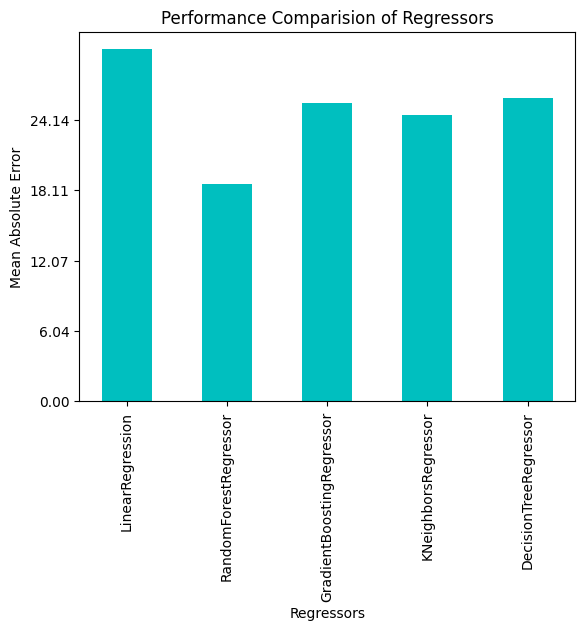

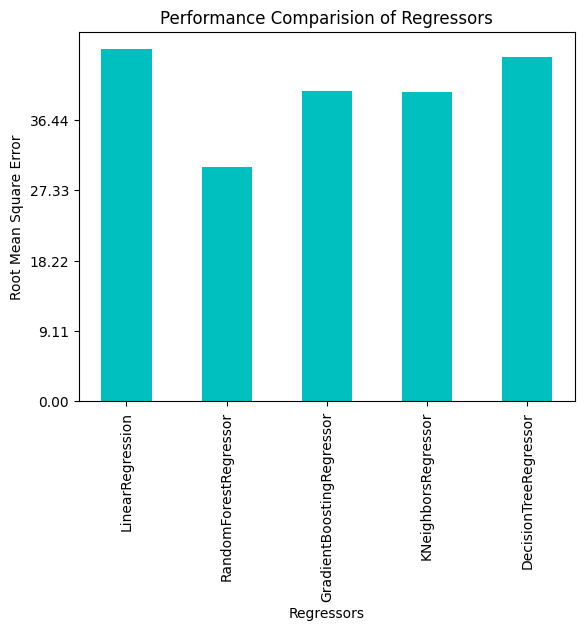

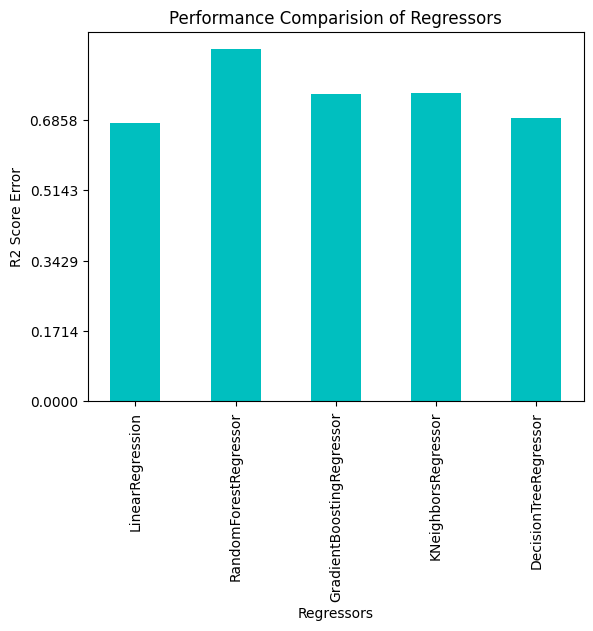

In [13]:
allRegressors(x_train, x_test, y_train, y_test)